In [170]:
#Importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## a)

To find the potential inside the box, one must solve Laplace's equation ($\nabla^2 V(x,y) = 0$), with the following boundary conditions:

- $V(-\dfrac{1}{2} d,(-0.5-0.5)) = 1$
- $V(\dfrac{1}{2} d,(-0.5-0.5)) = -1$
- $V(x,-1) = V(x,1) = V(-1,y) = V(1,y) = 0$

Another important result we will use in the Jacobi method is:
$$V(x_i, y_j) = \frac{1}{4}\big[ V(x_{i-1},y_j) + V(x_{i+1},y_j) + V(x_i,y_{j-1}) + V(x_i,y_{j+1})\big]$$


In [171]:
#Parameters to be used in the calculations

d = 0.5 # plate separation [m]
N = 200  # Size of array
error = 0.0001 # biggest allowed "error" (is used to find when to stop the calculations)

In [172]:
#Create an N long array V, and set potential at the plates
def create_plates(V, d, N):
    ΔL = d * N/4 #The distance from the center to the two plate capacitors placed parallel in a grounded box
    #Sets potential at the plates according to the boundary conditions
    V[N//4:3*N//4+1, int(N/2-ΔL)] = 1
    V[N//4:3*N//4+1, int(N/2+ΔL)] = -1

# Initialize 2D array, with all values equal to zero except for the plates.
def create_plate_array(d, N):
    plate_arr = np.zeros((N, N))
    create_plates(plate_arr, d, N)
    return plate_arr

In [173]:
# Does a single Jacobi step - calculates one step of the Jacobi algorithm
def Jacobi_step(V, d, N):
    V[1:N-1, 1:N-1] = 0.25 * (V[0:N-2, 1:N-1] + V[1:N-1, 0:N-2] + V[1:N-1, 2:N] + V[2:N, 1:N-1])
    create_plates(V, d, N)
    return V

#Jacobi calculate/estimates the new values for the potential V
#Solves Laplace's equation
def Jacobi_method(d, N, error):
    V_1 = create_plate_array(d, N)
    V_2 = V_1 * 0.0
    while np.linalg.norm(V_1 - V_2) > error:
        V_2 = V_1.copy()
        V_1 = Jacobi_step(V_1, d, N)
    return V_1

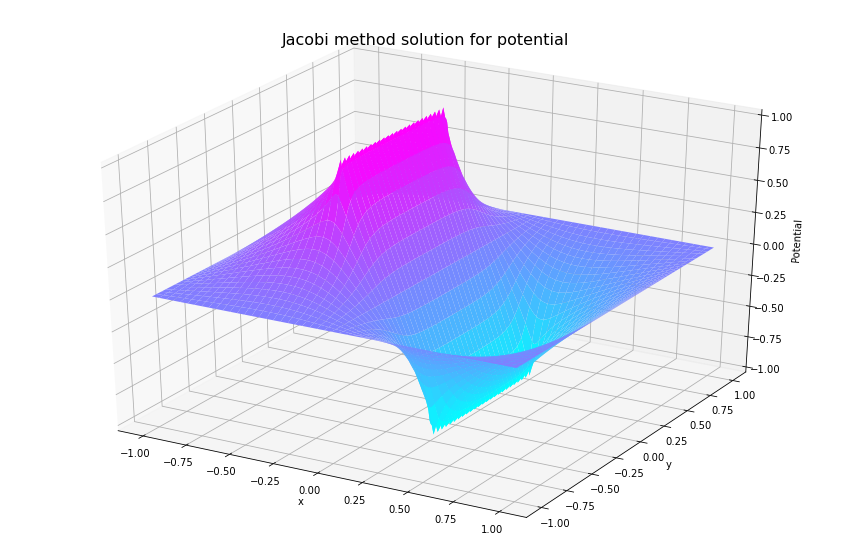

In [174]:
#Running the code:

V_jacobi = Jacobi_method(d, N, error)

#Visulaization Code:

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(15, 10))

x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)
ax.plot_surface(*np.meshgrid(x, y), V_jacobi, cmap="cool")
ax.set_title("Jacobi method solution for potential", fontsize=16)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("Potential")
plt.show()

## b)

We can find the electric field by using: $E = -\nabla V$

In [175]:
#Parameters to be used in the calculations

d = 0.5 # plate separation
N = 30 # Size of array
error = 0.0001 # biggest allowed "error" (is used to find when to stop the calculations)

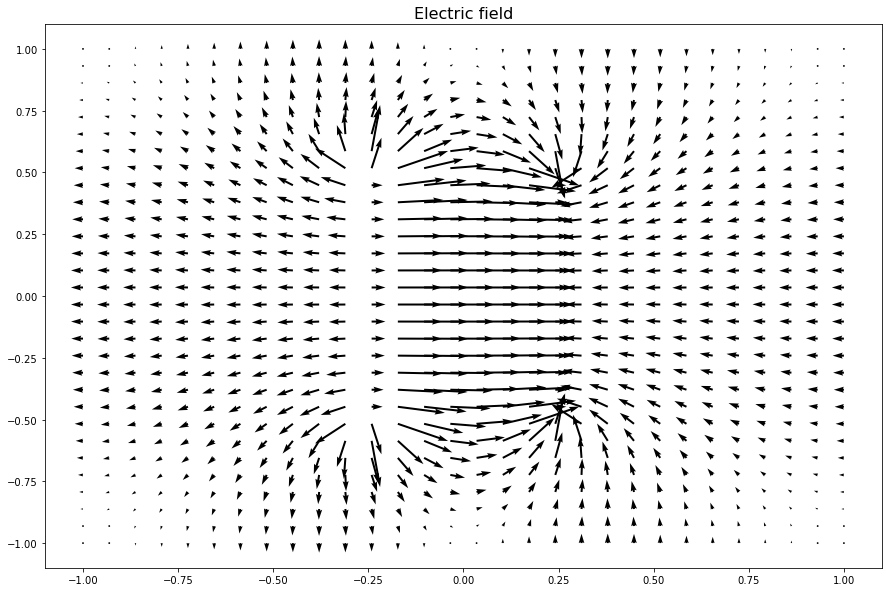

In [176]:
#Running the code:

V_jacobi = Jacobi_method(d, N, error)
E_jacobi = -np.array(np.gradient(V_jacobi))

#Visulaization Code:

x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)
plt.figure(figsize=(15, 10))
plt.quiver(*np.meshgrid(x, y), E_jacobi[1], E_jacobi[0])
plt.title("Electric field", size=16)
plt.show()

## c)

In [177]:
#Parameters to be used in the calculations

N = 100 # Size of array
error = 0.0001 # biggest allowed "error" (is used to find when to stop the calculations)

In [178]:
# Calculates the field strenght at point (0, 0.6)
def field_strength(d, N, error):
    V_jacobi = Jacobi_method(d, N, error)
    E_jacobi = -np.array(np.gradient(V_jacobi))
    E_vec = E_jacobi[:, int(0.4*N/2), N//2]
    return np.linalg.norm(E_vec)

#Running the code:

d_array = np.linspace(0.1,2,40) #List of plate seperation
field = d_array*0.0
for i, d in enumerate(d_arr):
    field[i] = field_strength(d, N, error)

IndexError: index 100 is out of bounds for axis 1 with size 100

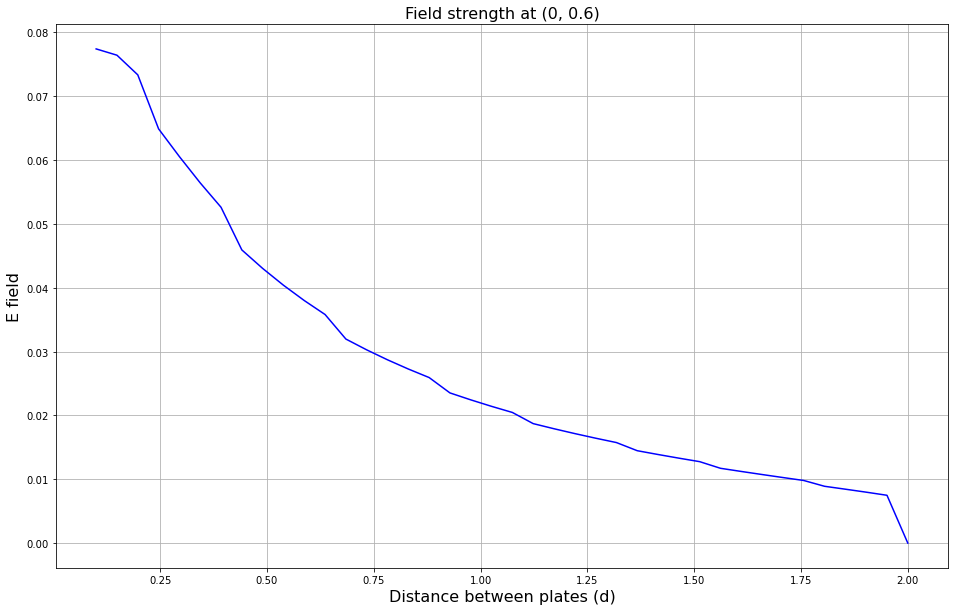

In [179]:
#Visulaization Code:

plt.figure(figsize = (16,10))
plt.plot(d_array, field, color = "blue")
plt.grid(True)
plt.title("Field strength at (0, 0.6)", size = 16)
plt.xlabel("Distance between plates (d)", size = 16)
plt.ylabel("E field", size = 16)
plt.show()